# **ANALYSIS OF CLIENT PAYMENT ABILITY PREDICTION AT HOME CREDIT INDONESIA USING RANDOM FOREST CLASSIFIER METHOD**

#**Import**


##Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest # Feature Selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample # Resample
from sklearn.model_selection import train_test_split # Data Splitting
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score # ROC Score
from sklearn.model_selection import KFold, cross_val_score # K-Fold Cross Validation
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score # Score for the K-Fold

from google.colab import files
import joblib # Save the model
import os # Check model on directory
import glob # Download files

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

##Dataset

I got the dataset directly through an internship program from Home Credit Indonesia. The dataset is stored as a CSV file. Pandas understands what a CSV file is, so here we can just load them.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/KULIAH/WORK/2. PROYEK/.ipynb/HOME CREDIT INDONESIA - DATA SCIENTIST/Dataset/application_train.csv"
df_train = pd.read_csv(file_path)

#**Data Pre-Processing**

I will then pre-process the data by identifying the data through data descriptions and cleaning the data through data cleaning.

## Data Descriptions

At the data descriptions stage I identified rows and columns, data types and data classes.

###Rows and Columns

In [ ]:
print('This Dataset has %d rows and %d columns.\n' %df_train.shape)
df_train.head(11)

This Dataset has 307511 rows and 122 columns.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

There are total 307,511 rows which contains the information of loans and there are 122 features.

The `TARGET` feature defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.

###Data Type

In [ ]:
print('Data Types: \n')
df_train.info(verbose=True)

Data Types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    in

###Data Classes

In [ ]:
train = df_train.copy()

In [ ]:
decode_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return decode_map[int(label)]

train['TARGET'] = train['TARGET'].apply(lambda x: decode_sentiment(x))

In [ ]:
target_grp = (train[['TARGET']]
              .groupby("TARGET")
              .agg(COUNT=("TARGET","count"))
              .reset_index()
              )

print('Client Loan Repayment Ability Distribution')
target_grp.style.background_gradient(cmap='Blues')

Client Loan Repayment Ability Distribution


,TARGET,COUNT
0,No Payment Difficulties,282686
1,Payment Difficulties,24825


In [ ]:
grp = train['TARGET'].value_counts(normalize=True)
print('Client Loan Repayment Ability Distribution')
grp.reset_index().style.background_gradient(cmap='Blues')

Client Loan Repayment Ability Distribution


,TARGET,proportion
0,No Payment Difficulties,0.919271
1,Payment Difficulties,0.080729


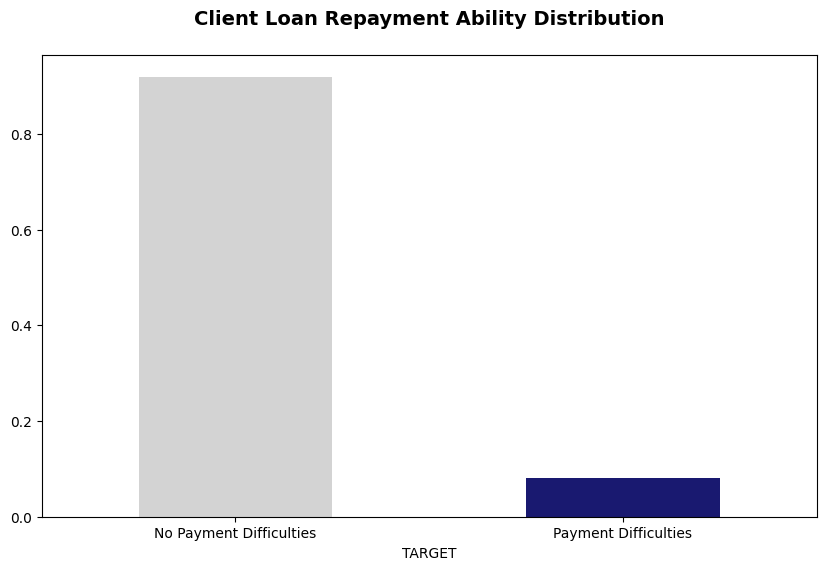

In [ ]:
fig = plt.figure(figsize=(10, 6))
grp.plot(kind='bar', color=['lightgrey', 'midnightblue'], alpha=1.0)
plt.title('Client Loan Repayment Ability Distribution\n', fontweight='bold', fontsize=14)
plt.xticks(rotation=0)
plt.show()

There are about 91% loans which is equal to about 282K with `TARGET` = 0, which indicates that client did not had any problems in repaying the loan in given time. While only 9% of the total loans (about 24K applicants) in this dataset involved the clients having problems in repaying the loan.

From this Data Classes stage we can find out that this dataset is imbalanced and it does require special treatment or resampling. The resampling step will be carried out in the model building section.

##Data Cleaning

Let's clean up the data from duplicates and missing values.

###Data Duplication

In [ ]:
print('The Number of Duplication is:', df_train.duplicated().sum())

The Number of Duplication is: 0


###Missing Values

In [ ]:
# Check for Empty Elements
print('Missing Values Status:', df_train.isnull().values.any())
nvc = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing Values Status: True


,index,Total Null Values,Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


In [ ]:
# Drop Features that Have Large Number of Missing Values (± 50%)
df_train.drop(df_train.iloc[:, 44:91], inplace=True, axis=1)
df_train.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1'], inplace=True, axis=1)

In [ ]:
# After Drop Some Features
print('Missing Values Status:', df_train.isnull().values.any())
nvc = pd.DataFrame(df_train.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing Values Status: True


,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
5,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
6,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
7,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
8,NAME_TYPE_SUITE,1292,0.420148
9,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021


<ipython-input-22-46e2ff378db4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])
<ipython-input-22-46e2ff378db4>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])
<ipython-input-22-46e2ff378db

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_DAY', ylabel='Density'>

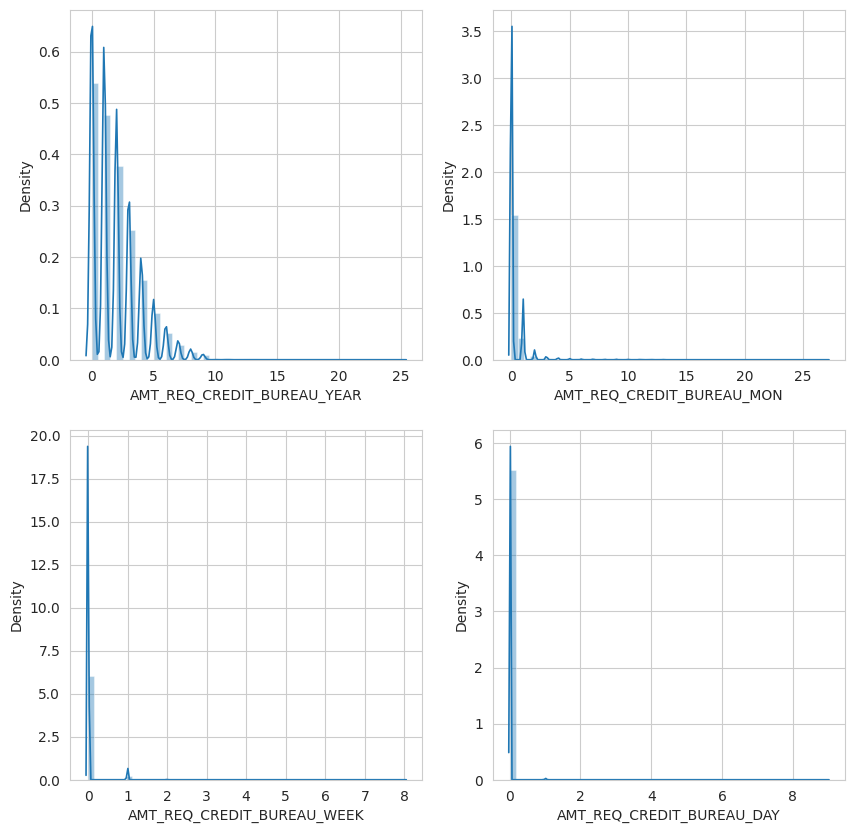

In [ ]:
# Distribution of Numerical Features that Have Missing Values Pt.1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[1][0])
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[1][1])

<ipython-input-23-9f32bc2260fe>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0][0])
<ipython-input-23-9f32bc2260fe>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[0][1])
<ipython-input-23-9f32bc2260f

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

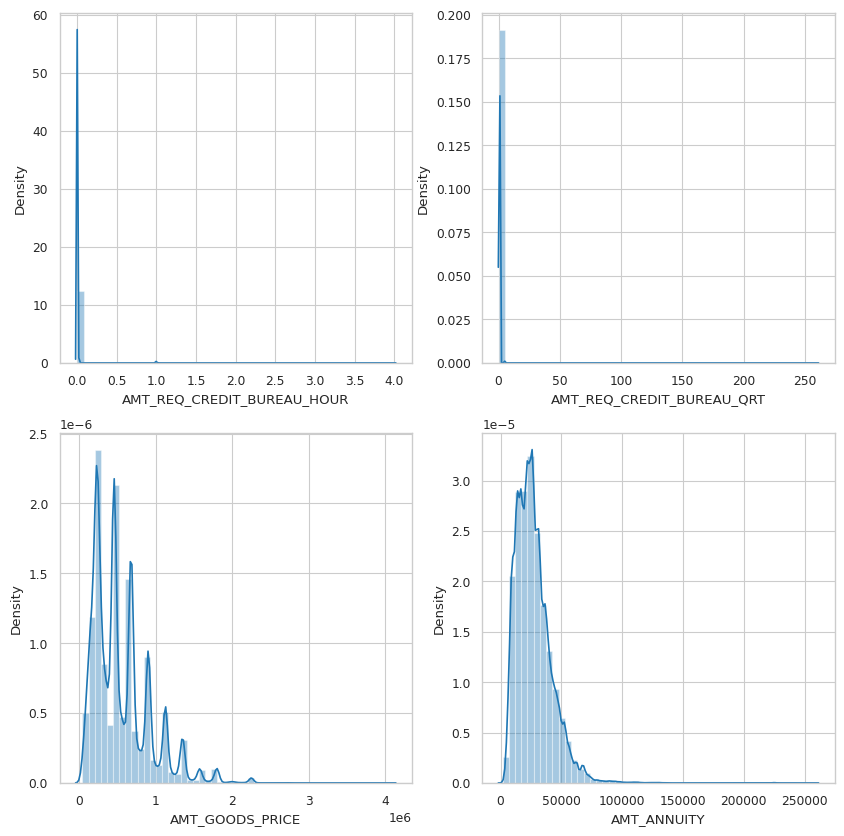

In [ ]:
# Distribution of Numerical Features that Have Missing Values Pt.2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0][0])
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[0][1])
sns.distplot(df_train['AMT_GOODS_PRICE'], ax=ax[1][0])
sns.distplot(df_train['AMT_ANNUITY'], ax=ax[1][1])

<ipython-input-24-863a6dbc5272>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])
<ipython-input-24-863a6dbc5272>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])
<ipython-input-24-863a6dbc5272>:

<Axes: xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='Density'>

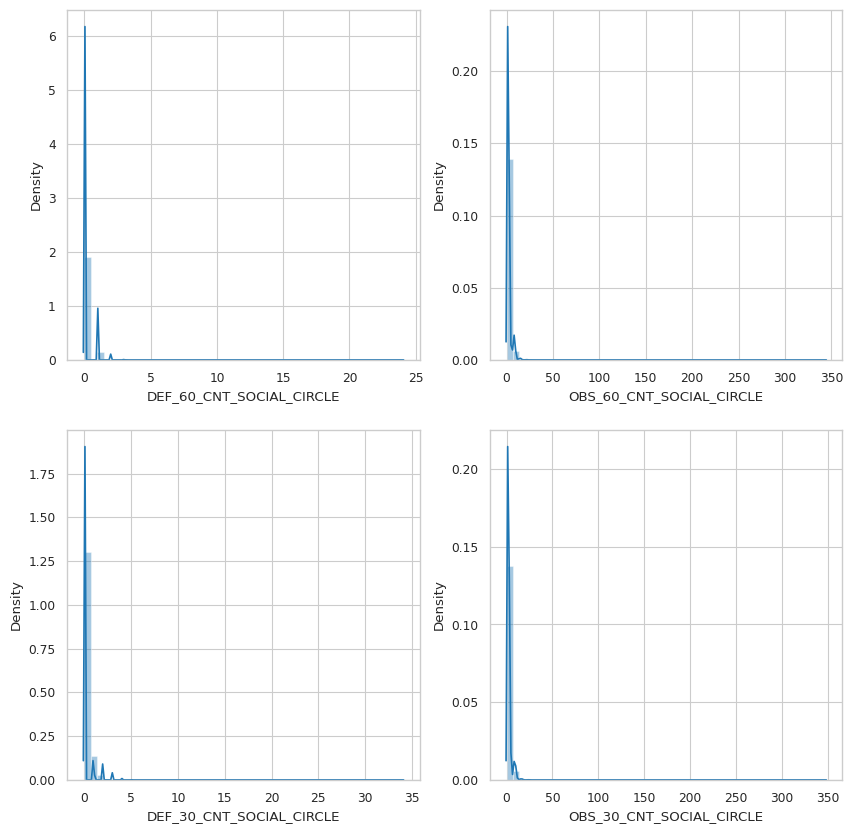

In [ ]:
# Distribution of Numerical Features that Have Missing Values Pt.3
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])
sns.distplot(df_train['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])
sns.distplot(df_train['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][0])
sns.distplot(df_train['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][1])

<ipython-input-25-ef140246bfac>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['CNT_FAM_MEMBERS'], ax=ax[0])
<ipython-input-25-ef140246bfac>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['DAYS_LAST_PHONE_CHANGE'], ax=ax[1])


<Axes: xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Density'>

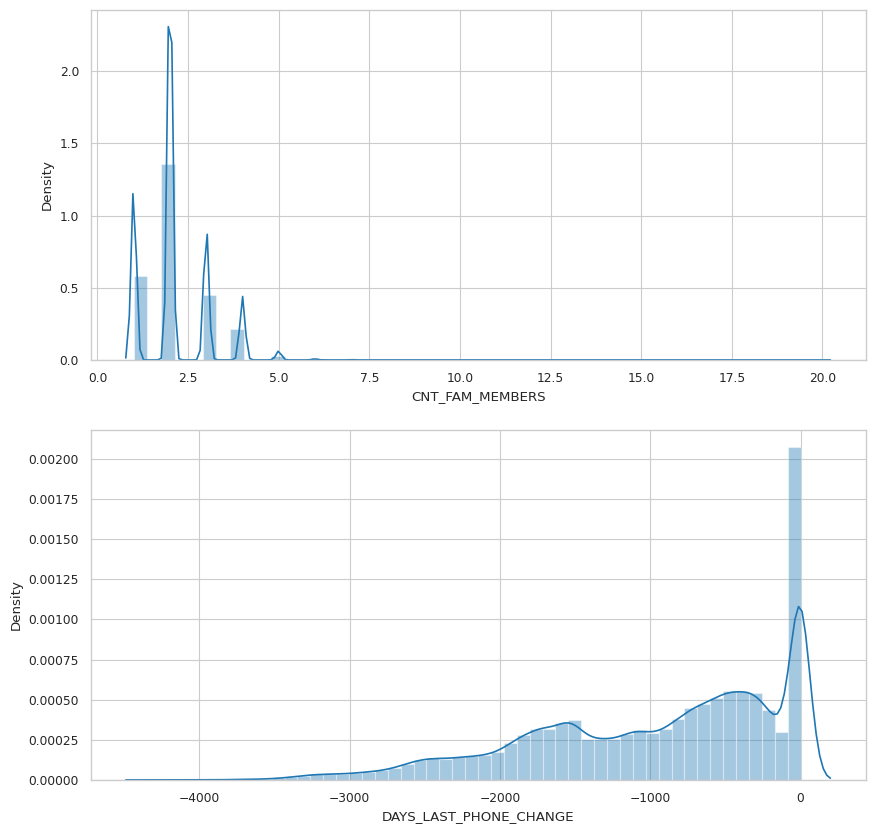

In [ ]:
# Distribution of Numerical Features that Have Missing Values Pt.4
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['CNT_FAM_MEMBERS'], ax=ax[0])
sns.distplot(df_train['DAYS_LAST_PHONE_CHANGE'], ax=ax[1])

It can be seen that the distribution of numerical features that mentioned above is skewed, so missing values in those features will be imputed with the median.

In [ ]:
# Impute Missing Values with Median Because the Data is Skewed for Numerical Features
# Impute Missing Values with Mode for Categorical Features

category_columns = df_train.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_train:
  if df_train[column].isnull().any():
    if(column in category_columns):
      df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
    else:
      df_train[column]=df_train[column].fillna(df_train[column].median())

In [ ]:
# After Imputation
print('Missing Values Status:', df_train.isnull().values.any())
print('\nThe Number of Missing Values for Each Columns (After Imputation): \n')
nvc = pd.DataFrame(df_train.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing Values Status: False

The Number of Missing Values for Each Columns (After Imputation): 



,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,REG_REGION_NOT_WORK_REGION,0,0.0
2,REGION_POPULATION_RELATIVE,0,0.0
3,AMT_INCOME_TOTAL,0,0.0
4,TARGET,0,0.0
5,NAME_CONTRACT_TYPE,0,0.0
6,CODE_GENDER,0,0.0
7,FLAG_OWN_CAR,0,0.0
8,FLAG_OWN_REALTY,0,0.0
9,CNT_CHILDREN,0,0.0


#**Feature Selection**

After the dataset was clean from duplicate data and empty values. Let's encode, drop, and convert negative to positive values.

##Label Encoding

In [ ]:
# Label Encoder for Object Features
df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]]=df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)
df_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,454500.0,5,4,4,1,1,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,8,2.0,2,2,6,16,0,0,0,0,0,0,33,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,6,1,1,1,1,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,0,3.0,2,2,3,16,0,0,0,0,0,0,5,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,0,1,1,1,0,360000.0,1530000.0,42075.0,1530000.0,6,4,1,1,1,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,10,2.0,3,3,1,16,0,0,0,0,1,1,33,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,0,0,0,1,0,112500.0,1019610.0,33826.5,913500.0,0,3,4,1,1,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,8,2.0,2,2,6,14,0,0,0,0,0,0,57,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,1,1,0,1,0,135000.0,405000.0,20250.0,405000.0,6,7,4,3,1,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,8,1.0,2,2,4,8,0,0,0,0,0,0,9,0.746644,0.535276,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


##Drop Unnecessary Features

In [ ]:
df_train.drop(['SK_ID_CURR','EXT_SOURCE_2','EXT_SOURCE_3'], inplace=True, axis=1)

##Convert Negative Values to Positive Values

The features that have negative values are `DAYS_BIRTH`, `DAYS_EMPLOYED`, `DAYS_ID_PUBLISH`, `DAYS_REGISTRATION`, and `DAYS_LAST_PHONE_CHANGE`

In [ ]:
df_train.iloc[:,16:20] = df_train.iloc[:,16:20].abs()
df_train.iloc[:,43] = df_train.iloc[:,43].abs()

##Final Feature Selection

After the data was completely clean. Next, I used chi-square to calculate the best correlation value for the target variable to sort out which variables I would use in the next more in-depth stage.

In [ ]:
x = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']

In [ ]:
# Feature Selection
bestFeatures = SelectKBest(score_func=chi2, k=10)
fit = bestFeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
total_score = featureScores['Score'].sum()
featureScores['Percentage'] = (featureScores['Score'] / total_score) * 100
featureScores['Percentage'] = featureScores['Percentage'].round(2)
sorted_featureScores = featureScores.sort_values(by=['Percentage'], ascending=False)
print('Features that Correlate Well with Target Features:\n')
featureScores.sort_values(by=['Score'], ascending=False)

Features that Correlate Well with Target Features:



,Features,Score,Percentage
16,DAYS_EMPLOYED,1.954124e+08,48.69
8,AMT_GOODS_PRICE,1.223080e+08,30.48
6,AMT_CREDIT,7.669987e+07,19.11
15,DAYS_BIRTH,2.235391e+06,0.56
5,AMT_INCOME_TOTAL,1.624102e+06,0.40
17,DAYS_REGISTRATION,1.348566e+06,0.34
42,DAYS_LAST_PHONE_CHANGE,6.656876e+05,0.17
18,DAYS_ID_PUBLISH,6.195946e+05,0.15
7,AMT_ANNUITY,3.913092e+05,0.10
37,ORGANIZATION_TYPE,4.138607e+03,0.00


It can be seen which features correlate well with payment difficulties.


1.   **Best Features**: `DAYS_EMPLOYED`, `AMT_GOODS_PRICE`, and `AMT_CREDIT`
2.   **Worst Features**: `FLAG_MOBIL`, `FLAG_COUNT_MOBIL`, `AMT_REQ_CREDIT_BUREAU_HOUR`



#**Data Splitting**

##Initial Data Splitting

After the variables were selected, I took the bottom 5000 data to use later in the prediction process to validate the accuracy of the data against data that had never been seen before.

In [ ]:
# Retrieve the bottom 5000 data for df_test
df_test = df_train.tail(5000)

# Retrieve the remainder for df_train2
df_train2 = df_train.iloc[:-5000]

# Check Total Data
print("Total Data:", len(df_train))
print("Total Data in df_train2:", len(df_train2))
print("Total Data in df_test:", len(df_test))

Total Data: 307511
Total Data in df_train2: 302511
Total Data in df_test: 5000


##Handling Data Imbalance

Because I found out in the early stages that there was an imbalance of data classes, that No Payment Difficulties with a total of 282686 and Payment Difficulties with a total of 24825. Therefore, I did handling by downsampling the majority data of No Payment Difficulties and upsampling the minority class of Payment Difficulties with several categories of N = 25,000, N = 75,000, and N = 100,000.

I found that the highest accuracy was achieved when N = 100,000. Based on this result, I decided to use N = 100,000 for my final analysis or model training, as it produced the best performance.

In [ ]:
# Create Two Different DataFrame of Majority and Minority Class
df_majority = df_train2[(df_train2['TARGET']==0)]
df_minority = df_train2[(df_train2['TARGET']==1)]

# Downsample Majority Class
df_majority_downsampled = resample (df_majority,
                        replace=True, # Sample Without Replacement
                        n_samples=100000, # To Match Minority Class
                        random_state=42) # Reproducible Results

# Upsample Minority Class
df_minority_upsampled = resample(df_minority,
                      replace=True, # Sample Without Replacement
                      n_samples=len(df_majority_downsampled), # To Match Majority Class
                      random_state=42) # Reproducible Results

# Gabungkan data mayoritas dan minoritas yang sudah di-sample
df_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

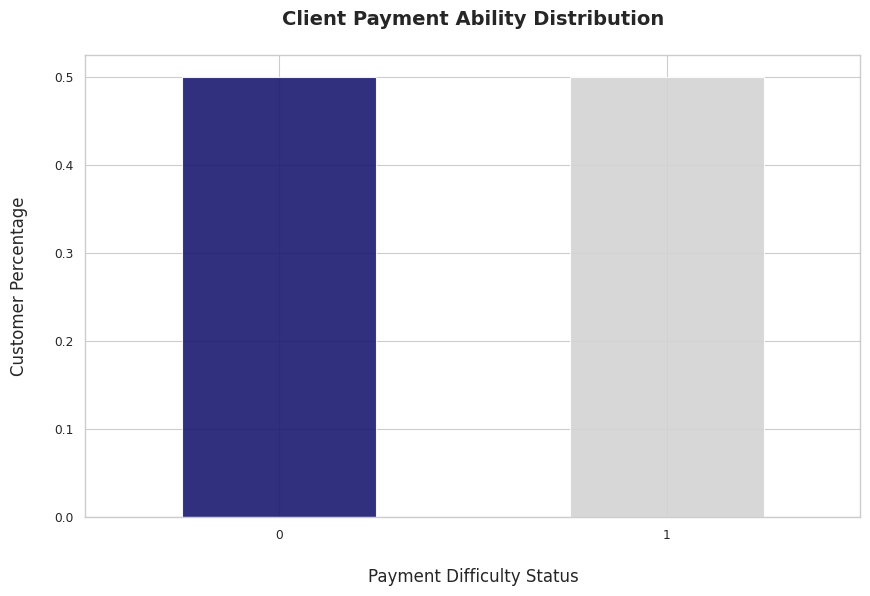

In [ ]:
fig = plt.figure(figsize = (10,6))
df_sampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color=['midnightblue','lightgrey'], alpha=0.9, rot=0)
plt.title('Client Payment Ability Distribution\n', fontweight='bold', fontsize=14)
plt.ylabel('Customer Percentage\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

It can be seen that data is balanced, so the analysis can be continued.

##Final Data Splitting

Based on the feature selection stage, I used the Chi-square test to select the most relevant features for my model. This step helps in determining which features have the highest statistical significance in predicting the target variable. After selecting the important features, I will define the variables and perform the final splitting of the dataset into training and testing sets.

In [ ]:
# Split the data into features (X) and labels (y)
x_balanced = df_sampled[['DAYS_EMPLOYED',
                         'AMT_GOODS_PRICE',
                         'AMT_CREDIT',
                         'DAYS_BIRTH',
                         'AMT_INCOME_TOTAL',
                         'DAYS_REGISTRATION',
                         'DAYS_LAST_PHONE_CHANGE',
                         'DAYS_ID_PUBLISH',
                         'AMT_ANNUITY'
                         ]]
y_balanced = df_sampled['TARGET']

# Split the data into 90% for training and 10% for testing
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.1, random_state=42)
print(x_train.shape, x_test.shape)
print(f"Total Training Data: {len(x_train)}")
print(f"Total Testing Data: {len(x_test)}")
print(f"The Proportion of Classes in the Training Data:\n{y_train.value_counts(normalize=True)}")
print(f"The Proportion of Classes in the Testing Data:\n{y_test.value_counts(normalize=True)}")

(180000, 9) (20000, 9)
Total Training Data: 180000
Total Testing Data: 20000
The Proportion of Classes in the Training Data:
TARGET
0    0.500217
1    0.499783
Name: proportion, dtype: float64
The Proportion of Classes in the Testing Data:
TARGET
1    0.50195
0    0.49805
Name: proportion, dtype: float64


#**Model Building**

 I chose to use the Random Forest Classifier because of its ability to handle large datasets and its robustness in providing high accuracy in prediction tasks. Random Forest is an ensemble learning method that aggregates multiple decision trees to improve predictive performance, making it effective for complex problems like client payment ability prediction.

In [ ]:
# Train the Model
rf_model = RandomForestClassifier().fit(x_train, y_train)
print(rf_model)

RandomForestClassifier()

RandomForestClassifier()


RandomForestClassifier()

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import graphviz

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0294333 to fit



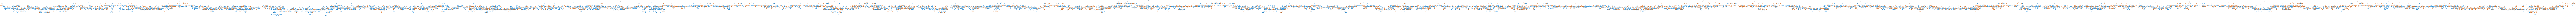

In [ ]:
estimator = rf_model.estimators_[0]

dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=x_balanced.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# Predict Data Train
y_train_pred_dt = rf_model.predict(x_train)

# Print Classification Report
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90039
           1       1.00      1.00      1.00     89961

    accuracy                           1.00    180000
   macro avg       1.00      1.00      1.00    180000
weighted avg       1.00      1.00      1.00    180000



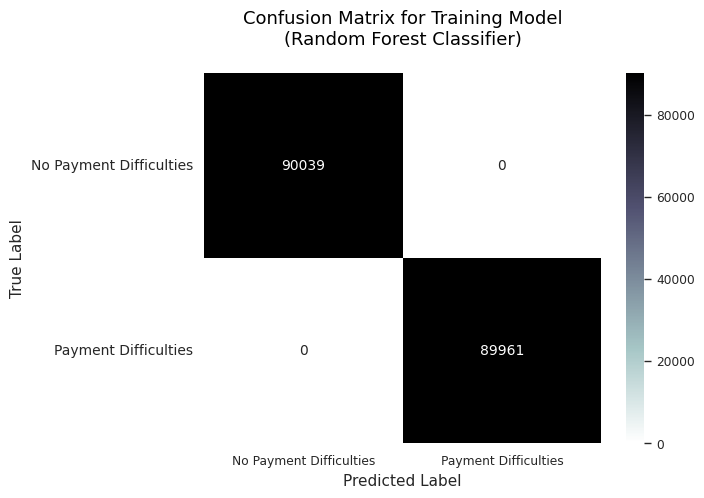

In [ ]:
# Form Confusion Matrix as a DataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)),('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# Plot Confusion Matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size':10}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.yaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model\n(Random Forest Classifier)\n', fontsize=13, color='black')
plt.ylabel('True Label', fontsize=11)
plt.xlabel('Predicted Label', fontsize=11)
plt.show()

In [ ]:
# Predict Data Test
y_test_pred_rf = rf_model.predict(x_test)

# Print Classification Report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      9961
           1       0.95      0.98      0.97     10039

    accuracy                           0.96     20000
   macro avg       0.97      0.96      0.96     20000
weighted avg       0.97      0.96      0.96     20000



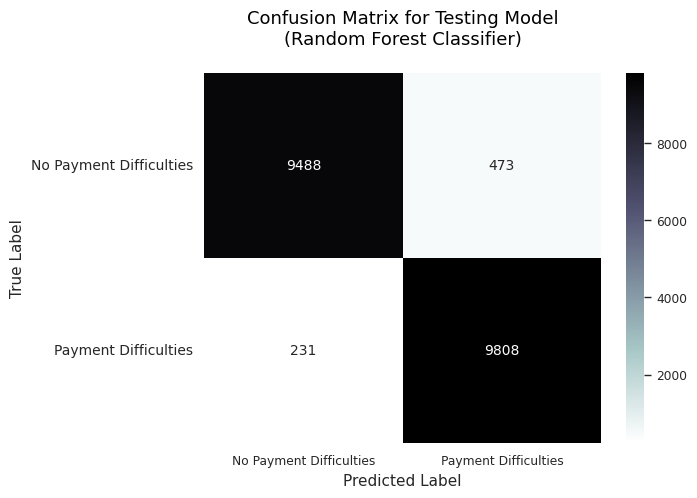

In [ ]:
# Form Confusion Matrix as a DataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# Plot Confusion Matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size':10}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.yaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Testing Model\n(Random Forest Classifier)\n', fontsize=13, color='black')
plt.ylabel('True Label', fontsize=11)
plt.xlabel('Predicted Label', fontsize=11)
plt.show()

In [ ]:
acc_rf_train=round(rf_model.score(x_train, y_train)*100,2)
acc_rf_test=round(rf_model.score(x_test, y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 96.48


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_test_pred_rf)
precision = precision_score(y_test, y_test_pred_rf)
recall = recall_score(y_test, y_test_pred_rf)
f1 = f1_score(y_test, y_test_pred_rf)

# Menghitung Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_rf).ravel()
specificity = tn / (tn + fp)

# Mencetak hasil metrik
print(f'Classification Test Results on Testing Data :')
print(f'Akurasi: {accuracy:.4f}')
print(f'Presisi: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'F1-Score: {f1:.4f}')

Classification Test Results on Testing Data :
Akurasi: 0.9648
Presisi: 0.9540
Recall: 0.9770
Specificity: 0.9525
F1-Score: 0.9654


It can be seen that :


In [ ]:
# ROC Scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9639


In [ ]:
# Save Model
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [ ]:
# Download Model
files.download('rf_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Validation**

##*K-Fold Cross Validation*

Validating the random forest model with k-fold cross validation with a value of k=10.

In [ ]:
# Define Parameters
k = 10
pos_label =1

# Define K-Fold Cross-Validation
cv = KFold(n_splits=k, shuffle=True, random_state=42)

# Define Scoring Functions
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'specificity': make_scorer(recall_score, pos_label = 0, average='binary'),
    'f1_score': 'f1_macro'
}

# Perform Cross-Validation (Using x_train, and y_train)
accuracy_results = cross_val_score(rf_model, x_train, y_train, cv=cv, scoring=scoring['accuracy'])
precision_results = cross_val_score(rf_model, x_train, y_train, cv=cv, scoring=scoring['precision'])
recall_results = cross_val_score(rf_model, x_train, y_train, cv=cv, scoring=scoring['recall'])
specificity_results = cross_val_score(rf_model, x_train, y_train, cv=cv, scoring=scoring['specificity'])
f1_score_results = cross_val_score(rf_model, x_train, y_train, cv=cv, scoring=scoring['f1_score'])

# Print Results
print("Accuracy Results:", accuracy_results)
print("Precision Results:", precision_results)
print("Recall Results:", recall_results)
print("Specificity Results:", specificity_results)
print("F1 Score Results:", f1_score_results)

Accuracy Results: [0.95877778 0.95788889 0.95888889 0.95694444 0.95594444 0.95772222
 0.95627778 0.95927778 0.95561111 0.95961111]
Precision Results: [0.95945793 0.95858078 0.95731374 0.95783761 0.95536974 0.95798686
 0.95779751 0.95936362 0.95581315 0.95972967]
Recall Results: [0.96023722 0.95718174 0.95768973 0.95714078 0.9553913  0.95875326
 0.95715255 0.95969213 0.95697348 0.9597939 ]
Specificity Results: [0.94980695 0.94394919 0.94469324 0.94645617 0.94174865 0.94720948
 0.94515519 0.94410558 0.94433443 0.94835313]
F1 Score Results: [0.95961068 0.95770927 0.95703789 0.95672    0.95560954 0.95826245
 0.95582474 0.95877217 0.95444441 0.96031934]


In [ ]:
# Perform Cross Validation
scores = cross_val_score(rf_model, x_train, y_train, cv=10)

# Print Results
print("Cross Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross Validation Scores: [0.95888889 0.95577778 0.95816667 0.9595     0.9585     0.959
 0.95827778 0.95655556 0.95905556 0.95688889]
Mean CV Score: 0.9580611111111113


#**Prediction**

Validate by predicting with a never-before-seen dataset that has been previously defined as the df_test variable.

In [ ]:
from sklearn.metrics import accuracy_score

# Retrieve features and targets from test data
x_test2 = df_test[['DAYS_EMPLOYED',
                  'AMT_GOODS_PRICE',
                  'AMT_CREDIT',
                  'DAYS_BIRTH',
                  'AMT_INCOME_TOTAL',
                  'DAYS_REGISTRATION',
                  'DAYS_LAST_PHONE_CHANGE',
                  'DAYS_ID_PUBLISH',
                  'AMT_ANNUITY'
                  ]]
y_test2 = df_test['TARGET']

# Make predictions using the trained model
y_pred = rf_model.predict(x_test2)

# Calculate accuracy
accuracy = accuracy_score(y_test2, y_pred)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8728


#**Real Case**

Test the model built against real case to predict the customer's loan capability.

In [ ]:
uploaded = files.upload()

Saving prediksi.csv to prediksi (1).csv


In [ ]:
# Data Application
import io
file_uploaded = next(iter(uploaded.values())) # Get the first value (File Uploaded) from the dictionary
file = io.BytesIO(file_uploaded) # Convert bytes to file-like object
df_test = pd.read_csv(file) # Read the CSV file-like object into a DataFrame

In [ ]:
pred_test = df_test[['DAYS_EMPLOYED',
                  'AMT_GOODS_PRICE',
                  'AMT_CREDIT',
                  'DAYS_BIRTH',
                  'AMT_INCOME_TOTAL',
                  'DAYS_REGISTRATION',
                  'DAYS_LAST_PHONE_CHANGE',
                  'DAYS_ID_PUBLISH',
                  'AMT_ANNUITY']]

In [ ]:
# Prediction
predict = pd.Series(rf_model.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([df_test['SK_ID_CURR'], predict], axis=1)
results.to_csv("Predict Application.csv", index=False)
results.head(10)

,SK_ID_CURR,TARGET
0,100001,0
1,100005,1
2,100013,0
3,100028,0
4,100038,0
5,100042,0
6,100057,0
7,100065,0
8,100066,0
9,100067,0
